In [67]:
%pylab nbagg
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [68]:
#code from internet to convert Matlab timestamps tp POSIX timestamps which python uses
import pandas as pd
from datetime import datetime

# Additional 366 because January 0, year 0000 
offset = datetime(1970, 1, 1).toordinal() #+ 366  #719529
pd.to_datetime(734139.5-offset, unit='D')

Timestamp('2011-01-02 12:00:00')

In [69]:
names_stations = ['Deepcove','Discovery Elementary','Helgesen','James Bay','John Muir','Keating','Uvic Science Building']

In [70]:
import statistics as stats
def remove_mean(x):
    z = stats.mean(x)
    n  = len(x)
    for i in range(n):
        x[i] = (x[i]-z)
    return x

In [71]:
#read minute data
f = open('DeepCove_temperature_2019.dat','r')
deepcove_f = f.readlines()
f.close()

In [72]:
#read minute data
f = open('DiscoveryElementary_temperature_2019.dat','r')
dis_elem_f = f.readlines()
f.close()

In [73]:
#read minute data
f = open('Helgesen_temperature_2019.dat','r')
helgesen_f = f.readlines()
f.close()

In [74]:
#read minute data
f = open('JamesBay_temperature_2019.dat','r')
jbay_f = f.readlines()
f.close()

In [75]:
#read minute data
f = open('JohnMuir_temperature_2019.dat','r')
john_f = f.readlines()
f.close()

In [76]:
#read minute data
f = open('Keating_temperature_2019.dat','r')
keat_f = f.readlines()
f.close()

In [77]:
#read minute data
f = open('UVicSci_temperature_2019.dat','r')
uvic_f = f.readlines()
f.close()

In [78]:
#Take down start and end dates for data and convert the to datetime objects
start_time = float(jbay_f[0])
end_time = float(jbay_f[1])
#Number of data entries
N = int(jbay_f[2])

#Store temperatures in a single list and convert them to floats
jbay_t = []
for i in range(3,len(jbay_f)):
    jbay_t.append(float(jbay_f[i]))

In [79]:
deepcove_t = []
N = int(deepcove_f[2])
for i in range(3,len(deepcove_f)):
    deepcove_t.append(float(deepcove_f[i]))

In [80]:
dis_elem_t = []
N = int(dis_elem_f[2])
for i in range(3,len(dis_elem_f)):
    dis_elem_t.append(float(dis_elem_f[i]))

In [81]:
helgesen_t = []
N = int(helgesen_f[2])
for i in range(3,len(helgesen_f)):
    helgesen_t.append(float(helgesen_f[i]))

In [82]:
john_t = []
N = int(john_f[2])
for i in range(3,len(john_f)):
    john_t.append(float(john_f[i]))

In [83]:
keat_t = []
N = int(keat_f[2])
for i in range(3,len(keat_f)):
    keat_t.append(float(keat_f[i]))

In [84]:
uvic_t = []
N = int(uvic_f[2])
for i in range(3,len(uvic_f)):
    uvic_t.append(float(uvic_f[i]))

In [116]:
len(deepcove_t)

0

In [117]:
len(jbay_t)

0

In [85]:

def retrieve_relavent_data(st,end,stamp_start,stamp_end,temps_min):
    #value to increment timestaps by
    dates = []
    temps = []
    N = len(temps_min)
    incr = (end - st)/N
    for i in range(N):
        stamp = st + i*incr
        #Ignore invalide entries, and uses temps_min 
        if str(temps_min[i]) == 'nan':
            temps_min[i] = temps_min[i-1]
        dates.append(stamp)

    return dates,temps_min

In [86]:
deepcove_data = retrieve_relavent_data(start_time,end_time,start_time,end_time,deepcove_t.copy())

In [87]:
dis_elem_data = retrieve_relavent_data(start_time,end_time,start_time,end_time,dis_elem_t.copy())

In [88]:
helgesen_data = retrieve_relavent_data(start_time,end_time,start_time,end_time,helgesen_t.copy())

In [89]:
jbay_data = retrieve_relavent_data(start_time,end_time,start_time,end_time,jbay_t.copy())

In [90]:
john_data = retrieve_relavent_data(start_time,end_time,start_time,end_time,john_t.copy())

In [91]:
keat_data = retrieve_relavent_data(start_time,end_time,start_time,end_time,keat_t.copy())

In [92]:
uvic_data = retrieve_relavent_data(start_time,end_time,start_time,end_time,uvic_t.copy())

In [93]:
deepcove_data[0][0]

734139.0

In [94]:
start_time

734139.0

deepcove_data 
dis_elem_data 
helgesen_data 
jbay_data 
john_data
keat_data
uvic_data

plt.figure(figsize=(20,10))
plt.plot_date(jbay_data[0], jbay_data[1])

plt.figure(figsize=(20,10))
plt.plot_date(deepcove_data[0], deepcove_data[1])

plt.figure(figsize=(20,10))
plt.plot_date(dis_elem_data[0], dis_elem_data[1])

plt.figure(figsize=(20,10))
plt.plot_date(helgesen_data[0], helgesen_data[1])

plt.figure(figsize=(20,10))
plt.plot_date(john_data[0], john_data[1])

plt.figure(figsize=(20,10))
plt.plot_date(keat_data[0], keat_data[1])

plt.figure(figsize=(20,10))
plt.plot_date(uvic_data[0], uvic_data[1])

In [95]:
deepcove_t =[]
dis_elem_t =[]
helgesen_t =[]
jbay_t =[]
john_t=[]
keat_t=[]
uvic_t=[]

In [96]:
#dates_1 = matplotlib.dates.date2num(jbay_time_sum)


def retrieve_relavent_data2(stamp_start,end,temps_min,stamps):
    #value to increment timestaps by
    dates = []
    temps = []
    temp_end = datetime.fromtimestamp(end)
    stamp_end = matplotlib.dates.date2num(temp_end)
    for i in range(len(stamps)):
        
        #Ignore invalide entries, and uses temps_min 
        if str(temps_min[i]) == 'nan':
            continue
        
        if stamps[i] >= stamp_start and stamps[i] <= stamp_end:
            #Add relavent dates and index associate temperatures
            temps.append(temps_min[i])
            dates.append(stamps[i])
        else:
            continue
    return dates,temps
    

In [97]:
date_time_str = '2011-01-01 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
print(date_start)
date_time_str = '2019-01-01 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
print(date_end)

stamp_start =datetime.timestamp(date_start)
print(stamp_start)
stamp_end = datetime.timestamp(date_end)
print(stamp_end)
temp_end = datetime.fromtimestamp(stamp_end)
print(matplotlib.dates.date2num(temp_end))
temp_start = datetime.fromtimestamp(stamp_start)
print(matplotlib.dates.date2num(temp_start))
print(start_time)
print(end_time)

2011-01-01 00:00:00
2019-01-01 00:00:00
1293868800.0
1546329600.0
737060.0
734138.0
734139.0
737668.99931


In [98]:
#deepcove_data 
#dis_elem_data 
#helgesen_data 
#jbay_data 
#john_data
#keat_data
#uvic_data
deepcove_2019 = retrieve_relavent_data2(start_time,stamp_end,deepcove_data[1].copy(),deepcove_data[0].copy())
dis_elem_2019 = retrieve_relavent_data2(start_time,stamp_end,dis_elem_data[1].copy(),dis_elem_data[0].copy())
helgesen_2019 = retrieve_relavent_data2(start_time,stamp_end,helgesen_data [1].copy(),helgesen_data [0].copy())
jbay_2019 = retrieve_relavent_data2(start_time,stamp_end,jbay_data[1].copy(),jbay_data[0].copy())
keat_2019 = retrieve_relavent_data2(start_time,stamp_end,keat_data[1].copy(),keat_data[0].copy())
john_2019 = retrieve_relavent_data2(start_time,stamp_end,john_data[1].copy(),john_data[0].copy())
uvic_2019 = retrieve_relavent_data2(start_time,stamp_end,uvic_data[1].copy(),uvic_data[0].copy())

In [99]:
data_2019 = [deepcove_2019,dis_elem_2019,helgesen_2019,jbay_2019,john_2019,keat_2019,uvic_2019]

del deepcove_data[1][:] 
del dis_elem_data [1][:]
del helgesen_data [1][:]
del jbay_data [1][:]
del john_data[1][:]
del keat_data[1][:]
del uvic_data[1][:]

In [154]:
deepcove_2019[0][0] 

734139.0

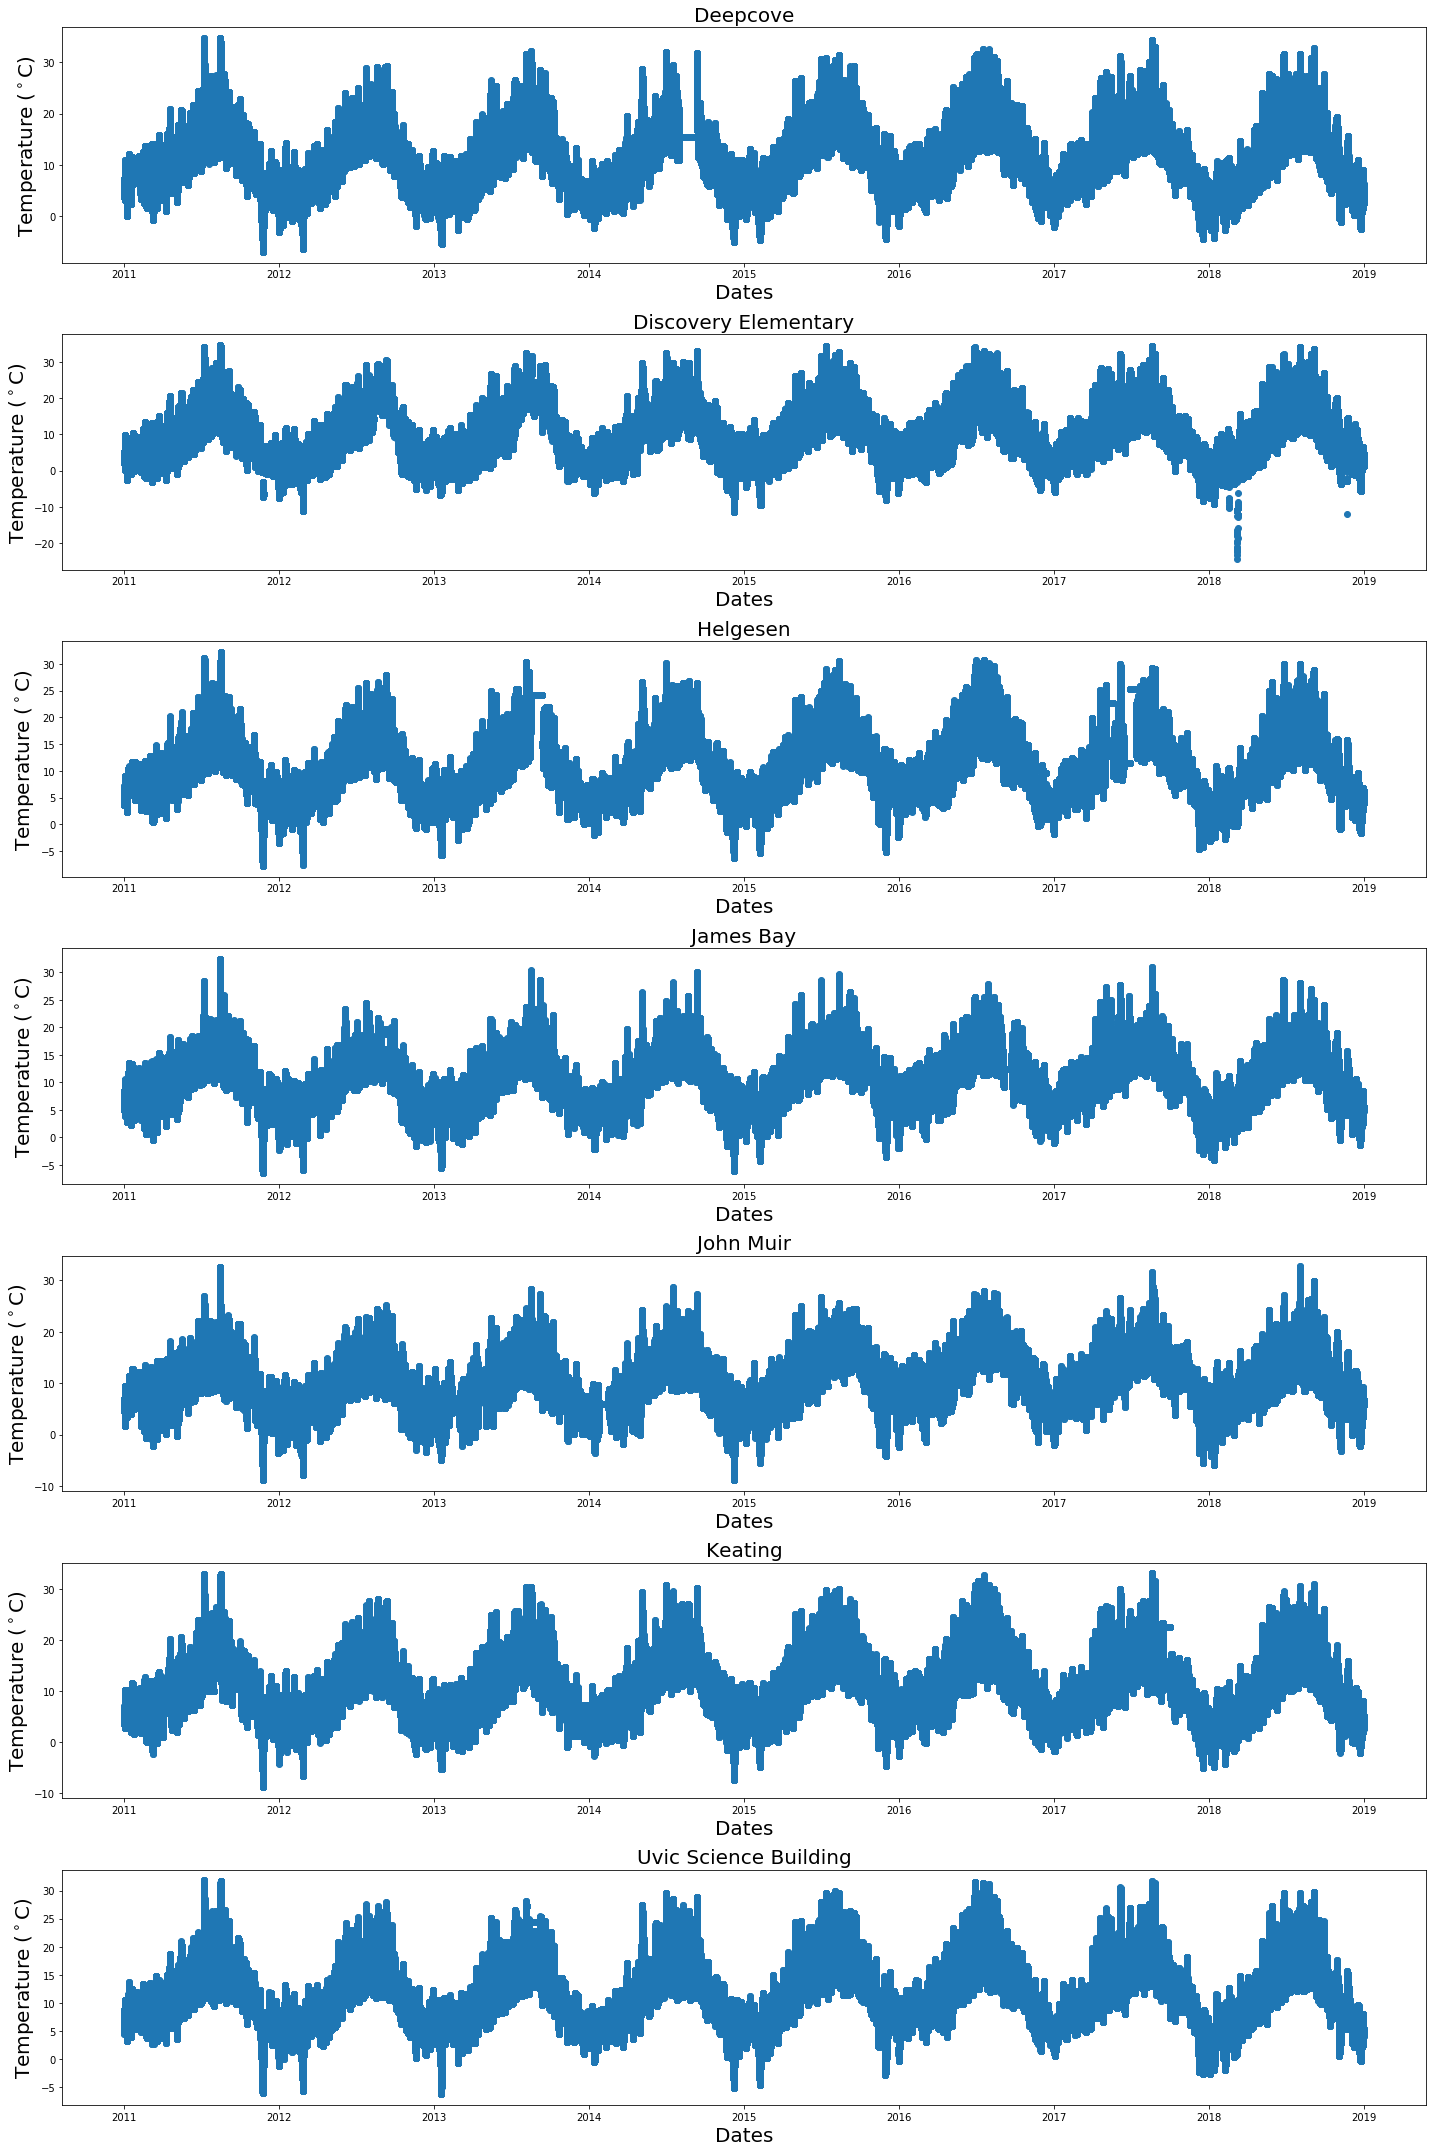

In [34]:
fig, axs = plt.subplots(7,1,figsize=(20,30))
#plt.legend(handles=[blue_patch2,orange_patch2],prop={'size': 14})

axs[0].plot_date(data_2019 [0][0] , data_2019 [0][1],linewidth=1.0)
axs[0].set_xlabel("Dates", fontsize=20)
axs[0].set_ylabel("Temperature ($^\circ$C)",   fontsize=20)
axs[0].set_title(names_stations[0],fontsize=20)
#plt.ylabel("Temperature ($^\circ$C)")

axs[1].plot_date(data_2019 [1][0] , data_2019 [1][1],linewidth=0.5)
axs[1].set_xlabel("Dates",fontsize=20)
axs[1].set_ylabel("Temperature ($^\circ$C)",fontsize=20)
axs[1].set_title(names_stations[1],fontsize=20)

axs[2].plot_date(data_2019 [2][0] , data_2019 [2][1],linewidth=1.0)
axs[2].set_xlabel("Dates", fontsize=20)
axs[2].set_ylabel("Temperature ($^\circ$C)",   fontsize=20)
axs[2].set_title(names_stations[2],fontsize=20)


axs[3].plot_date(data_2019 [3][0] , data_2019 [3][1],linewidth=0.5)
axs[3].set_xlabel("Dates",fontsize=20)
axs[3].set_ylabel("Temperature ($^\circ$C)",fontsize=20)
axs[3].set_title(names_stations[3],fontsize=20)

axs[4].plot_date(data_2019 [4][0] , data_2019 [4][1],linewidth=1.0)
axs[4].set_xlabel("Dates", fontsize=20)
axs[4].set_ylabel("Temperature ($^\circ$C)",   fontsize=20)
axs[4].set_title(names_stations[4],fontsize=20)


axs[5].plot_date(data_2019 [5][0] , data_2019 [5][1],linewidth=0.5)
axs[5].set_xlabel("Dates",fontsize=20)
axs[5].set_ylabel("Temperature ($^\circ$C)",fontsize=20)
axs[5].set_title(names_stations[5],fontsize=20)

axs[6].plot_date(data_2019 [6][0] , data_2019 [6][1],linewidth=1.0)
axs[6].set_xlabel("Dates", fontsize=20)
axs[6].set_ylabel("Temperature ($^\circ$C)",   fontsize=20)
axs[6].set_title(names_stations[6],fontsize=20)

fig.tight_layout()

for i in range(7):    
    plt.figure(figsize=(20,10))
    plt.plot_date(data_2019 [i][0] , data_2019 [i][1] )
    plt.ylabel("Temperature ($^\circ$C)")
    plt.title(names_stations[i])

In [34]:
#deepcove_2019
#dis_elem_2019 
#helgesen_2019
#jbay_2019
#john_2019
#keat_2019
#uvic_2019
means_2019 = []
means_2019.append(stats.mean(deepcove_2019[1])) 
means_2019.append(stats.mean(dis_elem_2019[1])) 
means_2019.append(stats.mean(helgesen_2019[1])) 
means_2019.append(stats.mean(jbay_2019[1])) 
means_2019.append(stats.mean(john_2019[1])) 
means_2019.append(stats.mean(keat_2019[1])) 
means_2019.append(stats.mean(uvic_2019[1])) 

In [71]:
std_2019 = []
std_2019.append(stats.stdev(deepcove_2019[1]))
std_2019.append(stats.stdev(dis_elem_2019[1]))
std_2019.append(stats.stdev(helgesen_2019[1]))
std_2019.append(stats.stdev(jbay_2019[1]))
std_2019.append(stats.stdev(john_2019[1]))
std_2019.append(stats.stdev(keat_2019[1]))
std_2019.append(stats.stdev(uvic_2019[1]))

In [36]:
variances_2019 = []
variances_2019.append(stats.variance(deepcove_2019[1]))
variances_2019.append(stats.variance(dis_elem_2019[1]))
variances_2019.append(stats.variance(helgesen_2019[1]))
variances_2019.append(stats.variance(jbay_2019[1]))
variances_2019.append(stats.variance(john_2019[1]))
variances_2019.append(stats.variance(keat_2019[1]))
variances_2019.append(stats.variance(uvic_2019[1]))

In [40]:
print(means_2019)

[10.870333345141184, 9.891142568863744, 10.364705419874895, 10.100467752561016, 10.113871977378377, 10.589581143828896, 11.139968223408978]


In [118]:
print(std_2019)

[6.079505623800592, 7.359471230890554, 5.871511884080129, 4.480057492887766, 4.866747845244834, 5.981440598328091, 5.552283711407195]


In [130]:
print(variances_2019)

[36.96038862982302, 54.16181679830572, 34.47465180489419, 20.070915139579814, 23.68523458919524, 35.77763163132751, 30.82785441195765]


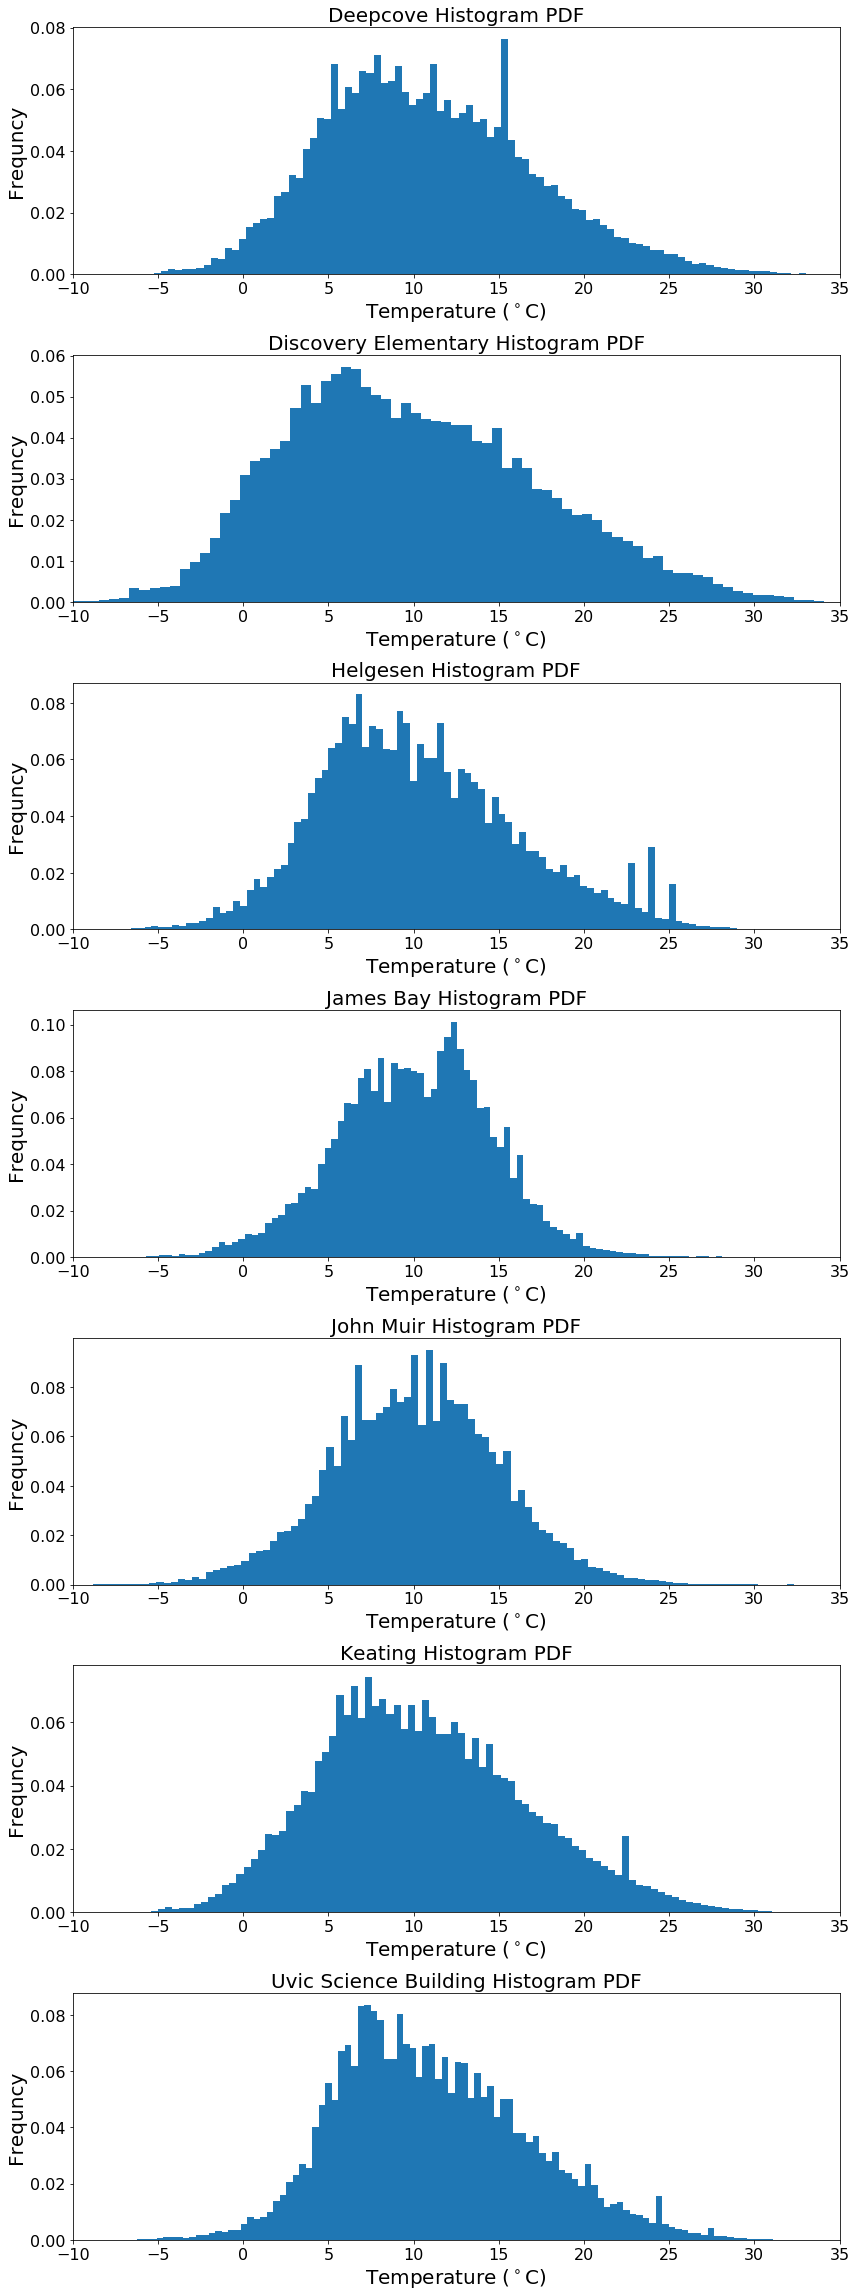

In [120]:
fig, axs = plt.subplots(7,1,figsize=(12,32))
#plt.legend(handles=[blue_patch2,orange_patch2],prop={'size': 14})

axs[0].hist(data_2019[0][1], bins = 100,density = True)
axs[0].set_xlabel("Temperature ($^\circ$C)", fontsize=20)
axs[0].set_ylabel("Frequncy",   fontsize=20)
axs[0].set_title(names_stations[0]+' Histogram PDF',fontsize=20)
axs[0].set_xlim(-10,35)
#plt.ylabel("Temperature ($^\circ$C)")

axs[1].hist(data_2019[1][1], bins = 100,density = True)
axs[1].set_xlabel("Temperature ($^\circ$C)",fontsize=20)
axs[1].set_ylabel("Frequncy",fontsize=20)
axs[1].set_title(names_stations[1]+' Histogram PDF',fontsize=20)
axs[1].set_xlim(-10,35)

axs[2].hist(data_2019[2][1], bins = 100,density = True)
axs[2].set_xlabel("Temperature ($^\circ$C)", fontsize=20)
axs[2].set_ylabel("Frequncy",   fontsize=20)
axs[2].set_title(names_stations[2]+' Histogram PDF',fontsize=20)
axs[2].set_xlim(-10,35)


axs[3].hist(data_2019[3][1], bins = 100,density = True)
axs[3].set_xlabel("Temperature ($^\circ$C)",fontsize=20)
axs[3].set_ylabel("Frequncy",fontsize=20)
axs[3].set_title(names_stations[3]+' Histogram PDF',fontsize=20)
axs[3].set_xlim(-10,35)

axs[4].hist(data_2019[4][1], bins = 100,density = True)
axs[4].set_xlabel("Temperature ($^\circ$C)", fontsize=20)
axs[4].set_ylabel("Frequncy",   fontsize=20)
axs[4].set_title(names_stations[4]+' Histogram PDF',fontsize=20)
axs[4].set_xlim(-10,35)


axs[5].hist(data_2019[5][1], bins = 100,density = True)
axs[5].set_xlabel("Temperature ($^\circ$C)",fontsize=20)
axs[5].set_ylabel("Frequncy",fontsize=20)
axs[5].set_title(names_stations[5]+' Histogram PDF',fontsize=20)
axs[5].set_xlim(-10,35)

axs[6].hist(data_2019[6][1], bins = 100,density = True)
axs[6].set_xlabel("Temperature ($^\circ$C)", fontsize=20)
axs[6].set_ylabel("Frequncy",   fontsize=20)
axs[6].set_title(names_stations[6]+' Histogram PDF',fontsize=20)
axs[6].set_xlim(-10,35)

fig.tight_layout()

for i in range(7):
    plt.figure(figsize=(16,8))
    plt.hist(data_2019[i][1], bins = 100,density = True)
    plt.title(names_stations[i])
    plt.xlim(-10,35)
plt.show()

In [138]:
plt.close('all')

Corellation

In [ ]:
#data_2019
for i in range(7):
    plt.figure(figsize=(16,8))
    plt.scatter(data_2019[0][1],data_2019[i][1])
    plt.title(('Deepcove Vs '+ names_stations[i]+' Temperature, 2011-2019'))
plt.show()

In [136]:
len(data_2019[0][1])

4206241

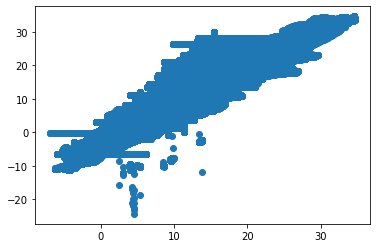

In [139]:
plt.scatter(data_2019[0][1],data_2019[1][1])

In [69]:
covariance_matrix = []
for i in range(7):
    covar = []
    for j in range(7):
        sxy = np.cov(data_2019[i][1],data_2019[j][1])
        covar.append(sxy[1][0])
    covariance_matrix.append(covar)

sxy = 0
for i in range(len(data_2019[4][1])):
    sxy = sxy + (data_2019[4][1][i]-means_2019[4])*(data_2019[0][1][i]-means_2019[0])
sxy = sxy/(len(data_2019[4][1])-1)

In [72]:
sample_cor_matrix = []
for i in range(7):
    r = []
    for j in range(7):
        r.append(covariance_matrix[i][j]/(std_2019[i]*std_2019[j]))
    sample_cor_matrix.append(r)

In [79]:
import pprint

pprint.pprint(sample_cor_matrix[6])
#pprint.pprint(sample_cor_matrix[3])

[0.9682261362298126,
 0.9521815522094504,
 0.9514533297540814,
 0.9398894122278604,
 0.9020119762023219,
 0.959234034018257,
 1.0000000000000029]


In [359]:
for i in range(7):
    print(sample_cor_matrix[0][i],sample_cor_matrix[1][i],sample_cor_matrix[2][i],
         sample_cor_matrix[3][i],sample_cor_matrix[4][i],sample_cor_matrix[5][i],
         sample_cor_matrix[6][i])

0.9999999999999977 0.9663272778248391 0.9367828898136885 0.9421597701919839 0.9102405589563728 0.9706463027646909 0.9682261362298126
0.9663272778248391 1.000000000000002 0.9328875936197524 0.9275213082011254 0.8988879579454636 0.9541941354238712 0.9521815522094504
0.9367828898136885 0.9328875936197524 0.9999999999999996 0.9174500697152195 0.9009783402539419 0.930427109104492 0.9514533297540814
0.9421597701919839 0.9275213082011254 0.9174500697152195 1.000000000000008 0.9318292920833553 0.9371832224460837 0.9398894122278604
0.9102405589563728 0.8988879579454636 0.9009783402539419 0.9318292920833553 1.0000000000000016 0.9114228204221149 0.9020119762023219
0.9706463027646909 0.9541941354238712 0.930427109104492 0.9371832224460837 0.9114228204221149 1.0000000000000073 0.959234034018257
0.9682261362298126 0.9521815522094504 0.9514533297540814 0.9398894122278604 0.9020119762023219 0.959234034018257 1.0000000000000029


In [369]:
w_matrix = []
for i in range(7):
    w_list = []
    for j in range(7):
        if int(sample_cor_matrix[i][j]+0.0000001) == 1:
            w = 1000
        else:
            w = 0.5 * np.log((1 + sample_cor_matrix[i][j])/(1 -sample_cor_matrix[i][j]))
        w_list.append(w)
    w_matrix.append(w_list)

In [370]:
zero_testing = []
N = len(data_2019[0][1])
sigma_w = (1.0)/(np.sqrt(N-3))
for i in range(7):
    zero_list = []
    for j in range(7):
        zero = w_matrix[i][j]/sigma_w
        zero_list.append(zero)
    zero_testing.append(zero_list)

In [371]:
sigma_w

0.0004875880786282144

In [372]:
zero_testing

[[2050911.5046729832,
  4170.7691957839825,
  3509.3234699762975,
  3603.319604630778,
  3135.6911496768903,
  4313.783002399752,
  4231.28056310749],
 [4170.7691957839825,
  2050911.5046729832,
  3445.9429514090616,
  3364.2101720426353,
  3007.4509691689555,
  3848.864661147651,
  3803.714068752628],
 [3509.3234699762975,
  3445.9429514090616,
  2050911.5046729832,
  3225.4153717672375,
  3030.00162078273,
  3407.714124164819,
  3787.8326243090855],
 [3603.319604630778,
  3364.2101720426353,
  3225.4153717672375,
  2050911.5046729832,
  3429.337005371574,
  3516.0499238608268,
  3562.638632308163],
 [3135.6911496768903,
  3007.4509691689555,
  3030.00162078273,
  3429.337005371574,
  2050911.5046729832,
  3149.922088869224,
  3041.31951196313],
 [4313.783002399752,
  3848.864661147651,
  3407.714124164819,
  3516.0499238608268,
  3149.922088869224,
  2050911.5046729832,
  3971.0377267449894],
 [4231.28056310749,
  3803.714068752628,
  3787.8326243090855,
  3562.638632308163,
  3041.3

Power Spectra

In [ ]:
len(uvic_2019[1])

In [44]:
len(keat_2019[1])-4194304

11937

In [45]:
#Delete end elements until length = 2^22
for i in range(11937):
    deepcove_2019[0].pop()
    dis_elem_2019 [0].pop()
    helgesen_2019[0].pop()
    jbay_2019[0].pop()
    john_2019[0].pop()
    keat_2019[0].pop()
    uvic_2019[0].pop()
    deepcove_2019[1].pop()
    dis_elem_2019 [1].pop()
    helgesen_2019[1].pop()
    jbay_2019[1].pop()
    john_2019[1].pop()
    keat_2019[1].pop()
    uvic_2019[1].pop()

In [82]:
#remove means before power spectra calculations
remove_mean(deepcove_2019[1])
remove_mean(dis_elem_2019 [1])
remove_mean(helgesen_2019[1])
remove_mean(jbay_2019[1])
remove_mean(john_2019[1])
remove_mean(keat_2019[1])
remove_mean(uvic_2019[1])

[-6.57213666677475,
 -6.60213666677475,
 -6.60213666677475,
 -6.57213666677475,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.552136666774749,
 -6.462136666774749,
 -6.44213666677475,
 -6.44213666677475,
 -6.44213666677475,
 -6.44213666677475,
 -6.44213666677475,
 -6.44213666677475,
 -6.44213666677475,
 -6.40213666677475,
 -6.382136666774749,
 -6.382136666774749,
 -6.382136666774749,
 -6.382136666774749,
 -6.35213666677475,
 -6.27213666677475,
 -6.27213666677475,
 -6.27213666677475,
 -6.27213666677475,
 -6.27213666677475,
 -6.27213666677475,
 -6.27213666677475,
 -6.27213666677475,
 -6.27213666677475,
 -6.2721366667

In [46]:
len(keat_2019[1])-4194304

0

In [47]:
len(uvic_2019[1])

4194304

In [80]:
from scipy.stats.distributions import chi2
import scipy.signal 

In [81]:
N = len(uvic_2019[1])
num_seg = 32
overlap = 65536
deepcove_2019_power = scipy.signal.welch(deepcove_2019[1],fs=1440,nperseg=131072,noverlap=overlap,scaling = 'spectrum')

In [82]:
M = 2*num_seg - 1
df= 1.33*M
c1 = chi2.ppf(1-0.975, df=df)
c2 = chi2.ppf(0.975, df=df)

deepcove_2019_power_low = (df/c2)*deepcove_2019_power[1]
deepcove_2019_power_upper = (df/c1)*deepcove_2019_power[1]

In [93]:
df

83.79

In [88]:
print(deepcove_2019_power_upper[0])
print(deepcove_2019_power[1][0])
print(deepcove_2019_power_low[0])


0.39405302357168026
0.28387263601094764
0.21428468664087597


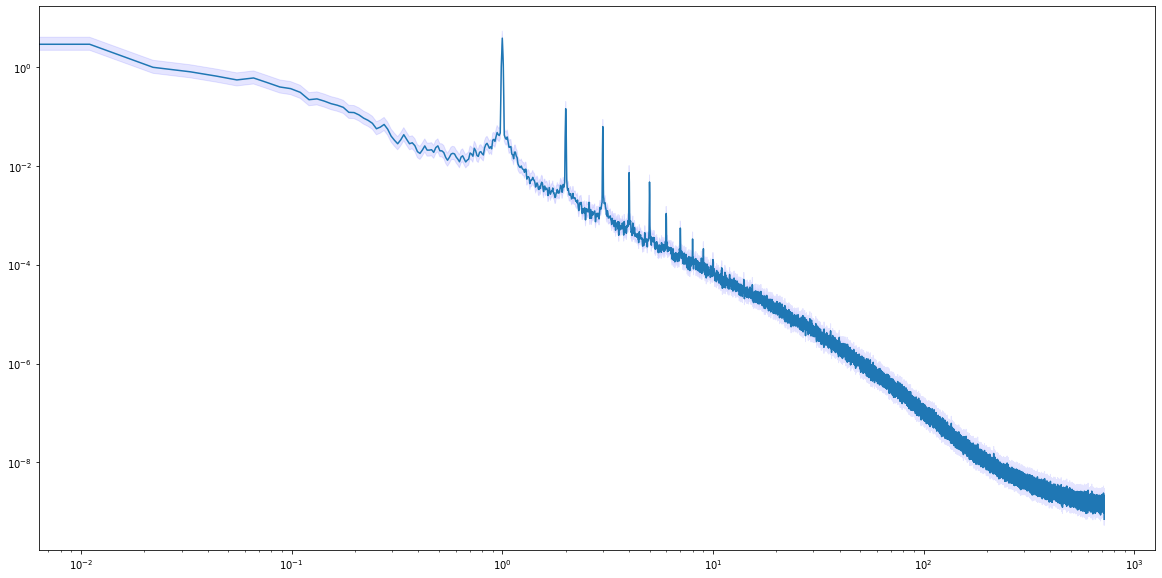

In [89]:
plt.figure(figsize=(20,10))
plt.loglog(deepcove_2019_power[0], deepcove_2019_power[1])
plt.fill_between(deepcove_2019_power[0], (deepcove_2019_power_low), (deepcove_2019_power_upper), color='b', alpha=.1)

In [83]:
#deepcove_2019
#dis_elem_2019 
#helgesen_2019
#jbay_2019
#john_2019
#keat_2019
#uvic_2019

#Calculate power spectra up to 2019 for each station
dis_elem_2019_power = scipy.signal.welch(dis_elem_2019[1],fs=1440,nperseg=131072,noverlap=overlap,scaling = 'spectrum')
helgesen_2019_power = scipy.signal.welch(helgesen_2019[1],fs=1440,nperseg=131072,noverlap=overlap,scaling = 'spectrum')
jbay_2019_power = scipy.signal.welch(jbay_2019[1],fs=1440,nperseg=131072,noverlap=overlap,scaling = 'spectrum')
john_2019_power = scipy.signal.welch(john_2019[1],fs=1440,nperseg=131072,noverlap=overlap,scaling = 'spectrum')
keat_2019_power = scipy.signal.welch(keat_2019[1],fs=1440,nperseg=131072,noverlap=overlap,scaling = 'spectrum')
uvic_2019_power = scipy.signal.welch(uvic_2019[1],fs=1440,nperseg=131072,noverlap=overlap,scaling = 'spectrum')

In [84]:
#list for all spectra data
power_spectra = [deepcove_2019_power,
                 dis_elem_2019_power,
                 helgesen_2019_power,
                 jbay_2019_power,
                john_2019_power,
                keat_2019_power,
                uvic_2019_power]

In [85]:
#calculate chi2 limits
dis_elem_2019_power_low = (df/c2)*dis_elem_2019_power[1]
dis_elem_2019_power_upper = (df/c1)*dis_elem_2019_power[1]

helgesen_2019_power_low = (df/c2)*helgesen_2019_power[1]
helgesen_2019_power_upper = (df/c1)*helgesen_2019_power[1]

jbay_2019_power_low = (df/c2)*jbay_2019_power[1]
jbay_2019_power_upper = (df/c1)*jbay_2019_power[1]

john_2019_power_low = (df/c2)*john_2019_power[1]
john_2019_power_upper = (df/c1)*john_2019_power[1]

keat_2019_power_low = (df/c2)*keat_2019_power[1]
keat_2019_power_upper = (df/c1)*keat_2019_power[1]

uvic_2019_power_low = (df/c2)*uvic_2019_power[1]
uvic_2019_power_upper = (df/c1)*uvic_2019_power[1]

power_spectra_limits = [[deepcove_2019_power_low,deepcove_2019_power_upper],
                        [dis_elem_2019_power_low,dis_elem_2019_power_upper],
                        [helgesen_2019_power_low,helgesen_2019_power_upper],
                        [jbay_2019_power_low,jbay_2019_power_upper],
                        [john_2019_power_low,john_2019_power_upper],
                        [keat_2019_power_low,keat_2019_power_upper],
                        [uvic_2019_power_low,uvic_2019_power_upper]]

In [96]:
names_stations = ['Deepcove','Discovery Elementary','Helgesen','James Bay','John Muir','Keating','Uvic Science Building']

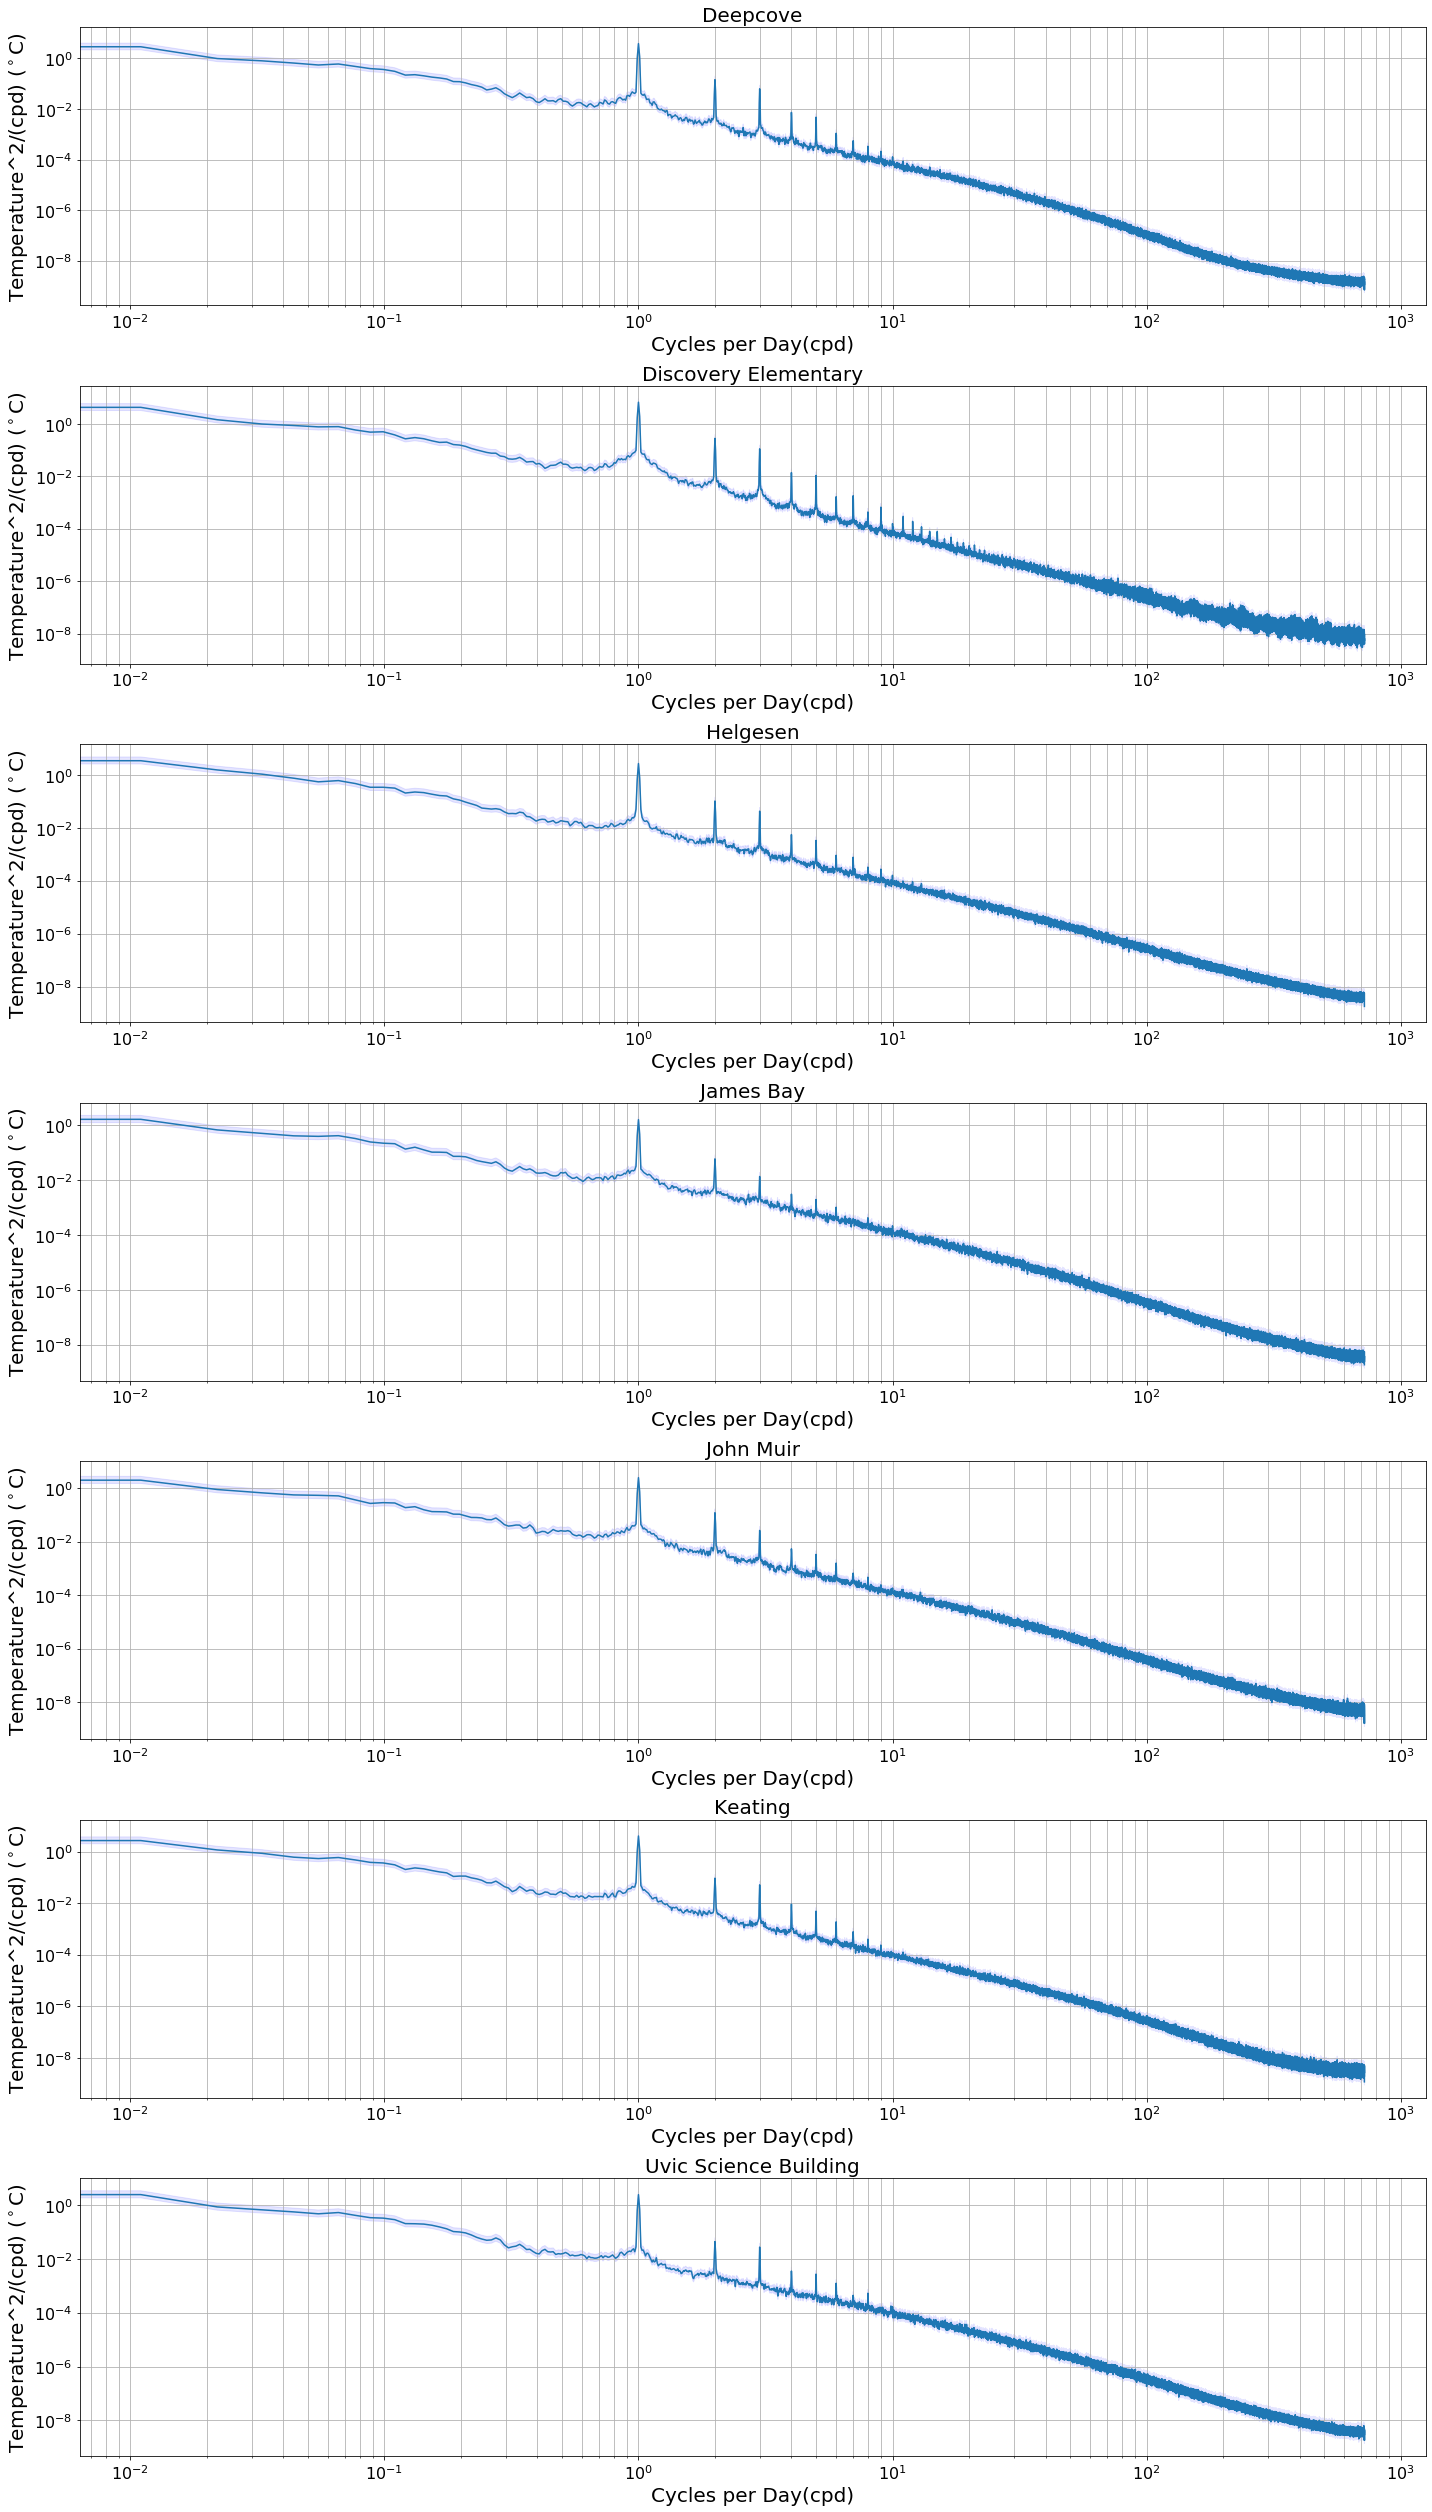

In [95]:
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
fig, axs = plt.subplots(7,1,figsize=(20,35))
#plt.legend(handles=[blue_patch2,orange_patch2],prop={'size': 14})


axs[0].loglog(power_spectra[0][0], power_spectra[0][1])
axs[0].fill_between(power_spectra[0][0], power_spectra_limits[0][0], power_spectra_limits[0][1], color='b', alpha=.1)
axs[0].set_xlabel("Cycles per Day(cpd)", fontsize=20)
axs[0].set_ylabel("Temperature^2/(cpd) ($^\circ$C)",   fontsize=20)
axs[0].set_title(names_stations[0],fontsize=20)
#axs[0].set_xticklabels(x_ticks, rotation=0, fontsize=8)
#axs[0].set_yticklabels(y_ticks, rotation=0, fontsize=8)
axs[0].grid(True, which="both")
#plt.ylabel("Temperature ($^\circ$C)")

axs[1].loglog(power_spectra[1][0], power_spectra[1][1])
axs[1].fill_between(power_spectra[1][0], power_spectra_limits[1][0], power_spectra_limits[1][1], color='b', alpha=.1)
axs[1].set_xlabel("Cycles per Day(cpd)",fontsize=20)
axs[1].set_ylabel("Temperature^2/(cpd) ($^\circ$C)",fontsize=20)
axs[1].set_title(names_stations[1],fontsize=20)
#axs[1].set_xticklabels(x_ticks, rotation=0, fontsize=8)
#axs[1].set_yticklabels(y_ticks, rotation=0, fontsize=8)
axs[1].grid(True, which="both")

axs[2].loglog(power_spectra[2][0], power_spectra[2][1])
axs[2].fill_between(power_spectra[2][0], power_spectra_limits[2][0], power_spectra_limits[2][1], color='b', alpha=.1)
axs[2].set_xlabel("Cycles per Day(cpd)", fontsize=20)
axs[2].set_ylabel("Temperature^2/(cpd) ($^\circ$C)",   fontsize=20)
axs[2].set_title(names_stations[2],fontsize=20)
#axs[2].set_xticklabels(x_ticks, rotation=0, fontsize=8)
#axs[2].set_yticklabels(y_ticks, rotation=0, fontsize=8)
axs[2].grid(True, which="both")


axs[3].loglog(power_spectra[3][0], power_spectra[3][1])
axs[3].fill_between(power_spectra[3][0], power_spectra_limits[3][0], power_spectra_limits[3][1], color='b', alpha=.1)
axs[3].set_xlabel("Cycles per Day(cpd)",fontsize=20)
axs[3].set_ylabel("Temperature^2/(cpd) ($^\circ$C)",fontsize=20)
axs[3].set_title(names_stations[3],fontsize=20)
#axs[3].set_xticklabels(x_ticks, rotation=0, fontsize=8)
#axs[3].set_yticklabels(y_ticks, rotation=0, fontsize=8)
axs[3].grid(True, which="both")

axs[4].loglog(power_spectra[4][0], power_spectra[4][1])
axs[4].fill_between(power_spectra[4][0], power_spectra_limits[4][0], power_spectra_limits[4][1], color='b', alpha=.1)
axs[4].set_xlabel("Cycles per Day(cpd)", fontsize=20)
axs[4].set_ylabel("Temperature^2/(cpd) ($^\circ$C)",   fontsize=20)
axs[4].set_title(names_stations[4],fontsize=20)
#axs[4].set_xticklabels(x_ticks, rotation=0, fontsize=8)
#axs[4].set_yticklabels(y_ticks, rotation=0, fontsize=8)
axs[4].grid(True, which="both")


axs[5].loglog(power_spectra[5][0], power_spectra[5][1])
axs[5].fill_between(power_spectra[5][0], power_spectra_limits[5][0], power_spectra_limits[5][1], color='b', alpha=.1)
axs[5].set_xlabel("Cycles per Day(cpd)",fontsize=20)
axs[5].set_ylabel("Temperature^2/(cpd) ($^\circ$C)",fontsize=20)
axs[5].set_title(names_stations[5],fontsize=20)
#axs[5].set_xticklabels(x_ticks, rotation=0, fontsize=8)
#axs[5].set_yticklabels(y_ticks, rotation=0, fontsize=8)
axs[5].grid(True, which="both")

axs[6].loglog(power_spectra[6][0], power_spectra[6][1])
axs[6].fill_between(power_spectra[6][0], power_spectra_limits[6][0], power_spectra_limits[6][1], color='b', alpha=.1)
axs[6].set_xlabel("Cycles per Day(cpd)", fontsize=20)
axs[6].set_ylabel("Temperature^2/(cpd) ($^\circ$C)",   fontsize=20)
axs[6].set_title(names_stations[6],fontsize=20)
#axs[6].set_xticklabels(x_ticks, rotation=0, fontsize=8)
#axs[6].set_yticklabels(y_ticks, rotation=0, fontsize=8)
axs[6].grid(True, which="both")

fig.tight_layout()

for i in range(7):
    plt.figure(figsize=(20,10))
    plt.loglog(power_spectra[i][0], power_spectra[i][1])
    plt.fill_between(power_spectra[i][0], power_spectra_limits[i][0], power_spectra_limits[i][1], color='b', alpha=.1)
    plt.xlabel("Cycles per Day(cpd)")
    plt.ylabel("Temperature^2 ($^\circ$C)")
    plt.title(names_stations[i])

Summer data

In [100]:
#dates_1 = matplotlib.dates.date2num(jbay_time_sum)


def retrieve_relavent_data3(start,end,temps_min,stamps):
    #value to increment timestaps by
    dates = []
    temps = []
    temp_end = datetime.fromtimestamp(end)
    stamp_end = matplotlib.dates.date2num(temp_end)
    temp_start = datetime.fromtimestamp(start)
    stamp_start = matplotlib.dates.date2num(temp_start)
    for i in range(1,len(stamps)):
        
        
        if stamps[i] >= stamp_start and stamps[i] <= stamp_end:
            #Add relavent dates and index associate temperatures
            temps.append(temps_min[i])
            dates.append(stamps[i])
        else:
            continue
    return dates,temps
    

In [101]:
pd.to_datetime(start_time-offset, unit='D')

Timestamp('2011-01-02 00:00:00')

In [102]:
summer_dates_yearly = []

date_time_str = '2011-11-01 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2012-05-15 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])

date_time_str = '2012-11-01 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2013-05-15 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])

date_time_str = '2013-11-01 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2014-05-15 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])

date_time_str = '2014-11-01 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2015-05-15 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])

date_time_str = '2015-11-01 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2016-05-15 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])

date_time_str = '2016-11-01 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2017-05-15 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])

date_time_str = '2017-11-01 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2018-05-15 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])


In [103]:
summer_dates_yearly = []

date_time_str = '2011-05-15 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2011-09-30 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])

date_time_str = '2012-05-15 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2012-09-30 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])

date_time_str = '2013-05-15 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2013-09-30 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])

date_time_str = '2014-05-15 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2014-09-30 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])

date_time_str = '2015-05-15 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2015-09-30 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])

date_time_str = '2016-05-15 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2016-09-30 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])

date_time_str = '2017-05-15 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2017-09-30 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])

date_time_str = '2018-05-15 00:00:00.00000'
date_start = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
date_time_str = '2018-09-30 00:00:00.000000'
date_end = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
summer_dates_yearly.append([datetime.timestamp(date_start),datetime.timestamp(date_end)])


In [104]:
deepcove_summer_data_allyears = []
dis_elem_summer_data_allyears = []
helgesen_summer_data_allyears = []
jbay_summer_data_allyears = []
john_summer_data_allyears = []
keat_summer_data_allyears = []
uvic_summer_data_allyears = []

In [105]:
(summer_dates_yearly[0][0])

1305442800.0

In [106]:
n = 8
for i in range(n):
    temperary_data = retrieve_relavent_data3(summer_dates_yearly[i][0],
                                             summer_dates_yearly[i][1],data_2019[0][1].copy(),data_2019[0][0].copy())
    deepcove_summer_data_allyears.append(temperary_data)

In [107]:
for i in range(n):
    temperary_data = retrieve_relavent_data3(summer_dates_yearly[i][0],
                                             summer_dates_yearly[i][1],data_2019[1][1].copy(),data_2019[1][0].copy())
    dis_elem_summer_data_allyears.append(temperary_data)

In [108]:
for i in range(n):
    temperary_data = retrieve_relavent_data3(summer_dates_yearly[i][0],
                                             summer_dates_yearly[i][1],data_2019[2][1].copy(),data_2019[2][0].copy())
    helgesen_summer_data_allyears.append(temperary_data)

In [109]:
for i in range(n):
    temperary_data = retrieve_relavent_data3(summer_dates_yearly[i][0],
                                             summer_dates_yearly[i][1],data_2019[3][1].copy(),data_2019[3][0].copy())
    jbay_summer_data_allyears.append(temperary_data)

In [110]:
for i in range(n):
    temperary_data = retrieve_relavent_data3(summer_dates_yearly[i][0],
                                             summer_dates_yearly[i][1],data_2019[4][1].copy(),data_2019[4][0].copy())
    john_summer_data_allyears.append(temperary_data)

In [111]:
for i in range(n):
    temperary_data = retrieve_relavent_data3(summer_dates_yearly[i][0],
                                             summer_dates_yearly[i][1],data_2019[5][1].copy(),data_2019[5][0].copy())
    keat_summer_data_allyears.append(temperary_data)

In [112]:
for i in range(n):
    temperary_data = retrieve_relavent_data3(summer_dates_yearly[i][0],
                                             summer_dates_yearly[i][1],data_2019[6][1].copy(),data_2019[6][0].copy())
    uvic_summer_data_allyears.append(temperary_data)

In [113]:
#put all summer data in a single place
summer_data = [deepcove_summer_data_allyears,
               dis_elem_summer_data_allyears,
               helgesen_summer_data_allyears,
               jbay_summer_data_allyears,
               john_summer_data_allyears,
               keat_summer_data_allyears,
               uvic_summer_data_allyears]

In [114]:
len(summer_data)

7

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


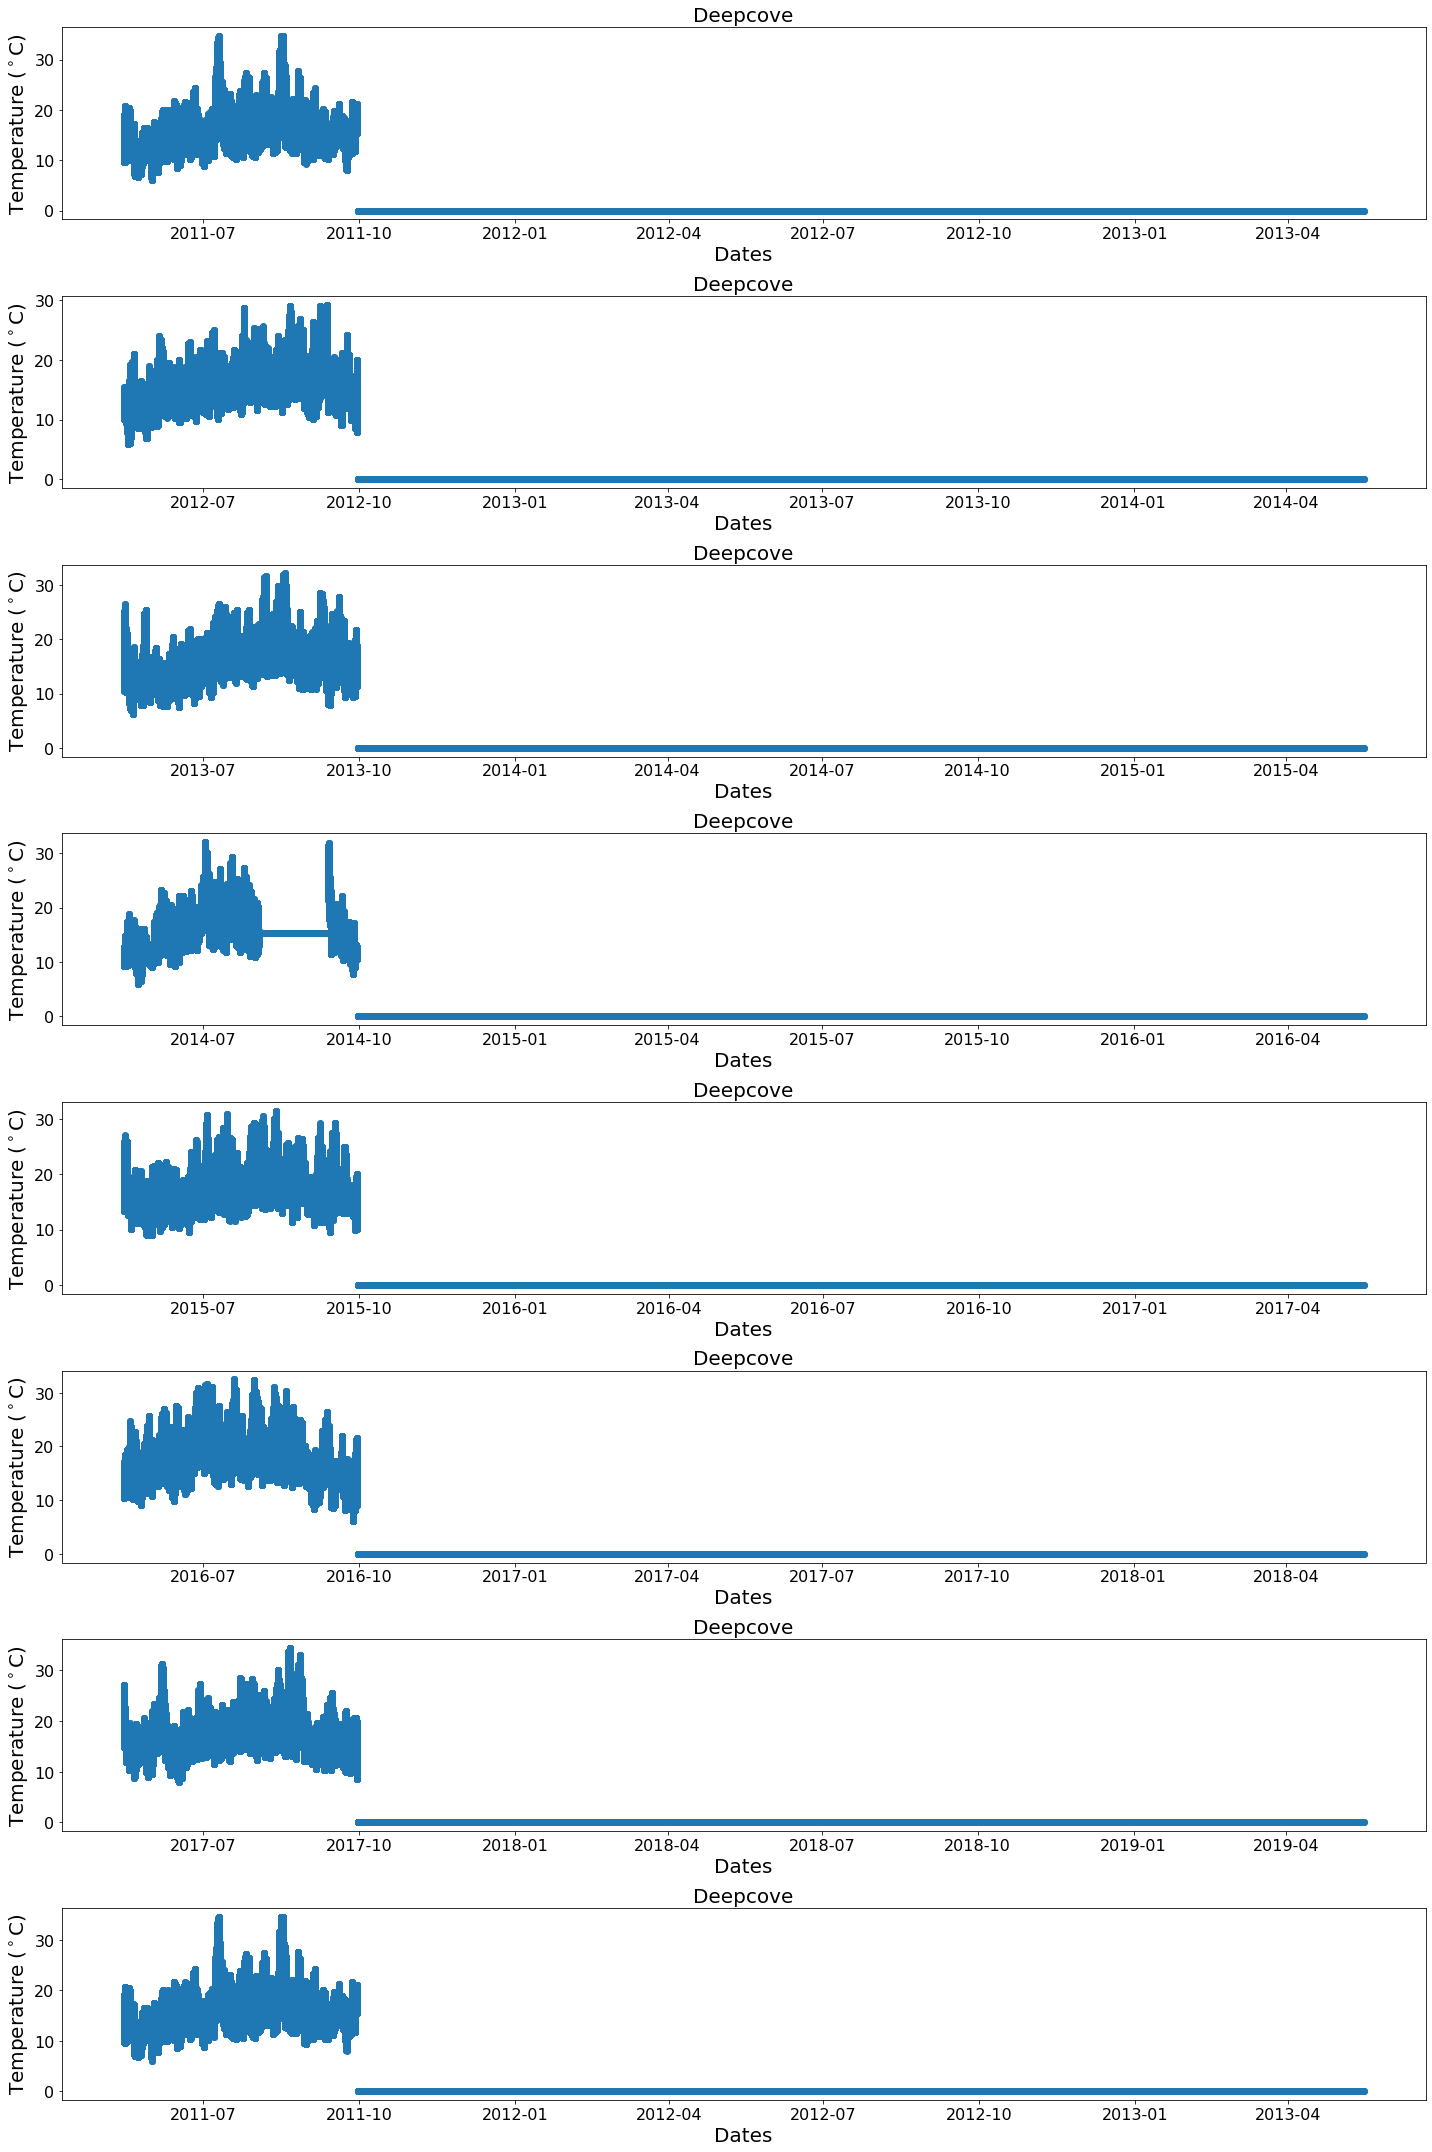

In [63]:
n=0
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
fig, axs = plt.subplots(8,1,figsize=(20,30))
#plt.legend(handles=[blue_patch2,orange_patch2],prop={'size': 14})

axs[0].plot_date(summer_data [n][0][0] , summer_data [n][0][1],linewidth=1.0)
axs[0].set_xlabel("Dates", fontsize=20)
axs[0].set_ylabel("Temperature ($^\circ$C)",   fontsize=20)
axs[0].set_title(names_stations[n],fontsize=20)
#plt.ylabel("Temperature ($^\circ$C)")

axs[1].plot_date(summer_data [n][1][0] , summer_data [n][1][1],linewidth=0.5)
axs[1].set_xlabel("Dates",fontsize=20)
axs[1].set_ylabel("Temperature ($^\circ$C)",fontsize=20)
axs[1].set_title(names_stations[n],fontsize=20)

axs[2].plot_date(summer_data [n][2][0] , summer_data [n][2][1],linewidth=1.0)
axs[2].set_xlabel("Dates", fontsize=20)
axs[2].set_ylabel("Temperature ($^\circ$C)",   fontsize=20)
axs[2].set_title(names_stations[n],fontsize=20)


axs[3].plot_date(summer_data [n][3][0] , summer_data [n][3][1],linewidth=0.5)
axs[3].set_xlabel("Dates",fontsize=20)
axs[3].set_ylabel("Temperature ($^\circ$C)",fontsize=20)
axs[3].set_title(names_stations[n],fontsize=20)

axs[4].plot_date(summer_data [n][4][0] , summer_data [n][4][1],linewidth=1.0)
axs[4].set_xlabel("Dates", fontsize=20)
axs[4].set_ylabel("Temperature ($^\circ$C)",   fontsize=20)
axs[4].set_title(names_stations[n],fontsize=20)


axs[5].plot_date(summer_data [n][5][0] , summer_data [n][5][1],linewidth=0.5)
axs[5].set_xlabel("Dates",fontsize=20)
axs[5].set_ylabel("Temperature ($^\circ$C)",fontsize=20)
axs[5].set_title(names_stations[n],fontsize=20)

axs[6].plot_date(summer_data [n][6][0] , summer_data [n][6][1],linewidth=1.0)
axs[6].set_xlabel("Dates", fontsize=20)
axs[6].set_ylabel("Temperature ($^\circ$C)",   fontsize=20)
axs[6].set_title(names_stations[n],fontsize=20)

axs[7].plot_date(summer_data [n][7][0] , summer_data [n][7][1],linewidth=1.0)
axs[7].set_xlabel("Dates", fontsize=20)
axs[7].set_ylabel("Temperature ($^\circ$C)",   fontsize=20)
axs[7].set_title(names_stations[n],fontsize=20)

fig.tight_layout()

for i in range(8):    
    plt.figure(figsize=(20,10))
    plt.plot_date(summer_data[6][i][0],summer_data[6][i][1])
    plt.xlabel("Dates")
    plt.ylabel("Temperature($^\circ$C)")
    plt.title(names_stations[i])
plt.show()

In [59]:
summer_means = []
for i in range(7):
    mean = []
    for j in range(8):
        mean.append(stats.mean(summer_data[i][j][1]))
    summer_means.append(mean)


In [150]:
for i in range(7):

     print(summer_means[i],'\n')

[15.600173913043479, 15.772028532608696, 15.900284671900161, 15.658036282206119, 17.390069092190018, 17.631165056360707, 16.84473017310789, 17.31476026570048] 

[15.107562600644123, 16.307912691223834, 17.247711352657007, 16.232099335748792, 17.133487268518518, 17.360391254025764, 16.470932669082124, 17.301752214170694] 

[14.3157778784219, 14.465656551932367, 16.381722876409018, 15.250113425925926, 16.31831672705314, 16.41573565821256, 16.769033413848632, 15.941743961352657] 

[13.401213466183576, 13.523638234702092, 13.491071608293076, 13.83726273148148, 14.653253119967793, 14.545679700080516, 14.425616696859903, 14.470713868760065] 

[12.910030495169082, 13.282732286634461, 13.174115640096618, 13.713634812801933, 14.930273500402576, 15.707112016908212, 15.056083132045089, 14.454934229066023] 

[14.20366379830918, 15.225725644122383, 15.346479367954911, 15.840156099033816, 16.80864397141707, 17.12827123590982, 17.341760366344605, 16.70155993357488] 

[15.22814573268921, 15.5061843800

In [151]:
summer_std = []
for i in range(7):
    std = []
    for j in range(8):
        std.append(stats.stdev(summer_data[i][j][1]))
    summer_std.append(std)

In [376]:
for i in range(7):

     print(summer_std[i],'\n')

[4.301147185319982, 3.826755359215088, 4.360254450702863, 3.6103310580437484, 4.113857099409007, 4.610600769317795, 4.213116198522698, 4.636667299434547] 

[5.120394911748602, 4.873719558425204, 5.376691152769445, 4.947779752808802, 5.243000135728575, 5.726447543354852, 4.9830397750449995, 5.596406442680806] 

[3.936525985140287, 3.691539221473749, 5.290694512381673, 3.795137088681326, 3.757911329930629, 4.299077946050566, 4.950935541492621, 4.294325473032694] 

[2.6295370906762905, 2.5337811130326906, 2.8009413092854616, 2.5923580390664247, 2.6409822639913183, 2.7555546387471543, 2.686691004639349, 2.8956471751438193] 

[4.086370982189079, 3.8252568326464433, 4.240790667684749, 3.9304814445921488, 3.947529989211048, 4.429196298818032, 4.349438125187458, 4.613421110275254] 

[3.1379355293481637, 3.209408169742877, 3.4872709235978037, 3.0646253223483093, 3.1446741523423554, 3.119178652190547, 3.146356585739404, 3.7304082004004484] 

[3.8516745800933467, 3.4361294256619743, 4.57549501704

In [378]:
#summer_data[i][j][1]

In [157]:
#calculate intervals at 95%
lower_limits = []
upper_limits = []
n = len(summer_data[i][j][1])
for i in range(7):
    lower = []
    upper = []
    for j in range(8):
        low = summer_means[i][j] - 1.96*summer_std[i][j]/np.sqrt(n)
        up = summer_means[i][j] + 1.96*summer_std[i][j]/np.sqrt(n)
        lower.append(low)
        upper.append(up)
    lower_limits.append(lower)
    upper_limits.append(upper)

In [161]:
for i in range(7):
    print(upper_limits[i],'\n')

[15.61908513476524, 15.78885395521224, 15.919455775591281, 15.673910133573182, 17.408156839571483, 17.65143687912387, 16.863254341460404, 17.335146697406174] 

[15.130075878917777, 16.329341390872532, 17.271351510535467, 16.253853662188764, 17.1565396156673, 17.38556921574259, 16.492842026277774, 17.32635841305732] 

[14.333085938925512, 14.4818874581776, 16.404984925503094, 15.266799829774994, 16.33483945722466, 16.434637781933038, 16.790801615614633, 15.96062518946852] 

[13.412774976823597, 13.534778726844866, 13.503386746521855, 13.848660773805236, 14.664864952580274, 14.55779528285286, 14.437429501002018, 14.483445408369786] 

[12.923827324709498, 13.296843366046204, 13.189448422444801, 13.727109313084755, 14.944099958223088, 15.720826376482488, 15.069916987164422, 14.4713360338755] 

[14.22163069512808, 15.242544478025989, 15.365125215013084, 15.857437582988991, 16.826000414166593, 17.147745462121385, 17.360883912972174, 16.721844156772367] 

[15.245080719762617, 15.5212923041821

In [127]:
len(summer_data[0][0][0])

212992

In [116]:
len(summer_data[0])

8

In [117]:
N = 212992
for i in range(len(summer_data)):
    for j in range(len(summer_data[0])):
        while len(summer_data[i][j][1]) < N:
            summer_data[i][j][1].append(0.0)
            summer_data[i][j][0].append(summer_data[i][j][0][-1]+0.0416)

for i in range(len(summer_data)):
    for j in range(len(summer_data[0])):
        print(len(summer_data[i][j][1]))

In [118]:
deepcove_summer_data_power = []
dis_elem_summer_data_power= []
helgesen_summer_data_power = []
jbay_summer_data_power = []
john_summer_data_power = []
keat_summer_data_power = []
uvic_summer_data_power = []
all_summer_power = [deepcove_summer_data_power,dis_elem_summer_data_power,helgesen_summer_data_power,
                   jbay_summer_data_power,john_summer_data_power,keat_summer_data_power,uvic_summer_data_power ]

In [119]:
#calculate power spectra
from scipy.stats.distributions import chi2
import scipy.signal 
num_seg2 = 13
M2 = 2*num_seg2 - 1
df2= 1.33*M2
N = 212992
overlap2= 8192

for i in range(len(summer_data)):
    for j in range(len(summer_data[0])):
        f_power = scipy.signal.welch(remove_mean(summer_data[i][j][1].copy()),fs=1440,nperseg=16384,noverlap=overlap2,scaling = 'spectrum')
        all_summer_power[i].append(f_power)

In [120]:
num_seg2 = 13
M2 = 2*num_seg2 - 1
df2= 1.33*M2
N = 212992
overlap2= 8192

c1 = chi2.ppf(1-0.975, df=df2)
c2 = chi2.ppf(0.975, df=df2)

power_spectra_limits_summer = []
for i in range(7):
    lower = []
    upper = []
    for j in range(7):
        lower.append(all_summer_power[i][j][1]*(df2/c2))
        upper.append(all_summer_power[i][j][1]*(df2/c1))
    power_spectra_limits_summer.append([lower,upper])

In [100]:
len(power_spectra_limits_summer[0])

2

In [121]:
plt.close('all')

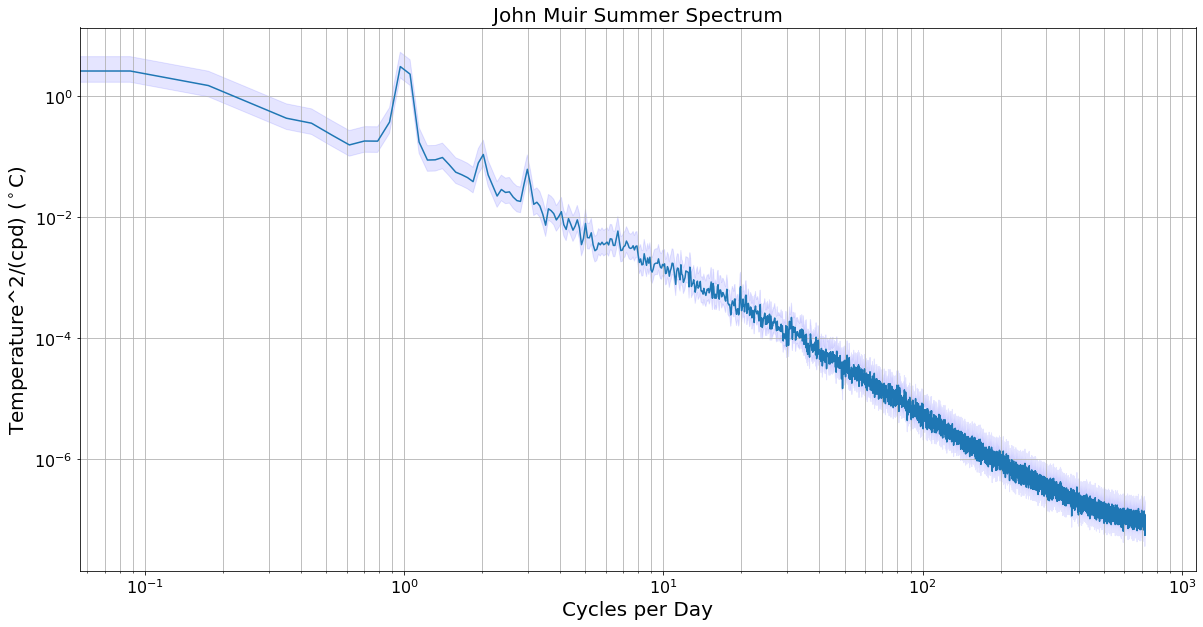

In [125]:
n = 4
for i in range(1):   
    plt.rc('xtick',labelsize=16)
    plt.rc('ytick',labelsize=16)
    plt.figure(figsize=(20,10))
    plt.loglog(all_summer_power[n][i][0], all_summer_power[n][i][1])
    #plt.fill_between(power_spectra_limits_summer[0][1][i], power_spectra_limits_summer[0][0][i], color='b', alpha=.1)
    plt.fill_between(all_summer_power[n][i][0], (power_spectra_limits_summer[n][0][i]), (power_spectra_limits_summer[n][1][i]), color='b', alpha=.1)
    plt.grid(True, which="both")
    plt.xlabel("Cycles per Day", fontsize = 20)
    plt.ylabel("Temperature^2/(cpd) ($^\circ$C)",fontsize = 20)
    plt.title(names_stations[n]+' Summer Spectrum',fontsize = 20)


#dates_1 = matplotlib.dates.date2num(jbay_time_sum)


def set_NULL_values_to_mean(temps_min,stamps):
    #value to increment timestaps by
    dates = []
    temps = []
    mean = stats.mean(temps_min)
    for i in range(0,len(stamps)-1):
        
        
        if temps_min[i]==temps_min[i+1]:
            temps_min[i]=mean
        temps.append(temps_min[i])
        dates.append(stamps[i])

    return dates,temps

In [285]:
#mean_corrected_summer_data
mcsummer_data = []

In [286]:
len(summer_data[0])

8

for i in range(7):
    temp = []
    for j in range(8):
        temp2 = set_NULL_values_to_mean(summer_data[i][j][1].copy(),summer_data[i][j][0].copy())
        temp.append(temp2)
    mcsummer_data.append(temp)

In [60]:
from scipy.stats.distributions import chi2
from scipy import signal
import scipy.signal

In [97]:
import seaborn as sns